# **WALMART RETAIL DATA**

In [52]:
import pandas as pd
data = pd.read_csv('lets_walmart_retail_data.csv')
print(data.head())


         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport            54     Jessica Myrick   Small Business      0.10   
1  Montebello            54  Elizabeth Moffitt         Consumer      0.08   
2  Montebello            54  Elizabeth Moffitt         Consumer      0.09   
3  Prior Lake            54     David Philippe         Consumer      0.06   
4      Draper            54         Larry Tron      Home Office      0.05   

   Number of Records  Order Date  Order ID Order Priority  Order Quantity  \
0                  1  2012-01-01     28774           High              32   
1                  1  2012-01-02     44069       Critical              43   
2                  1  2012-01-02     44069       Critical              16   
3                  1  2012-01-02      9285       Critical               3   
4                  1  2012-01-03      9762           High              12   

   ...         State Unit Price Zip Code Order Processing Time Total Disco

### *DATA CLEANING*

In [53]:
# Convert 'Order Date' and 'Ship Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Check for missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

# Fill or drop missing values if any
data.fillna(method='ffill', inplace=True)

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Verify the cleaning process
print("Missing values after cleaning:")
print(data.isnull().sum())

print("Data after cleaning:")
print(data.head())

Missing values before cleaning:
City                     0
Customer Age             0
Customer Name            0
Customer Segment         0
Discount                 0
Number of Records        0
Order Date               0
Order ID                 0
Order Priority           0
Order Quantity           0
Product Base Margin      0
Product Category         0
Product Container        0
Product Name             0
Product Sub-Category     0
Profit                   0
Region                   0
Row ID                   0
Sales                    0
Ship Date                0
Ship Mode                0
Shipping Cost            0
State                    0
Unit Price               0
Zip Code                 0
Order Processing Time    0
Total Discount           0
Profit Margin            0
Order Year               0
Order Month              0
Order Day of Week        0
Order Week of Year       0
dtype: int64
Missing values after cleaning:
City                     0
Customer Age             0
Custom

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\1058167402.py:10: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [54]:
from statsmodels.tsa.arima.model import ARIMA


### *DATA PROCESSING*

> Converting Date Columns to Datetime

In [55]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

print(data[['Order Date', 'Ship Date']].dtypes)

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


> Setting Date Columns as Index

In [56]:
data.set_index('Order Date', inplace=True)
print(data.head())

                  City  Customer Age      Customer Name Customer Segment  \
Order Date                                                                 
2012-01-01  McKeesport            54     Jessica Myrick   Small Business   
2012-01-02  Montebello            54  Elizabeth Moffitt         Consumer   
2012-01-02  Montebello            54  Elizabeth Moffitt         Consumer   
2012-01-02  Prior Lake            54     David Philippe         Consumer   
2012-01-03      Draper            54         Larry Tron      Home Office   

            Discount  Number of Records  Order ID Order Priority  \
Order Date                                                         
2012-01-01      0.10                  1     28774           High   
2012-01-02      0.08                  1     44069       Critical   
2012-01-02      0.09                  1     44069       Critical   
2012-01-02      0.06                  1      9285       Critical   
2012-01-03      0.05                  1      9762          

> Initial Data Exploration

In [57]:
# Display basic statistics
print("Basic Statistics:")
print(data.describe())

# Display the first few rows of the dataframe
print("\nFirst Few Rows:")
print(data.head())

Basic Statistics:
       Customer Age     Discount  Number of Records      Order ID  \
count   5416.000000  5416.000000             5416.0   5416.000000   
mean      54.464734     0.049549                1.0  30081.159712   
min       41.000000     0.000000                1.0      3.000000   
25%       47.000000     0.020000                1.0  15066.500000   
50%       54.000000     0.050000                1.0  30179.500000   
75%       60.000000     0.080000                1.0  44678.000000   
max       95.000000     0.210000                1.0  59971.000000   
std        8.916844     0.031819                0.0  17312.726882   

       Order Quantity  Product Base Margin       Profit       Row ID  \
count     5416.000000          5416.000000  5416.000000  5416.000000   
mean        25.889402             0.476532     0.111253  4216.287482   
min          1.000000             0.350000 -2175.090000     1.000000   
25%         14.000000             0.370000   -60.589000  2105.500000   


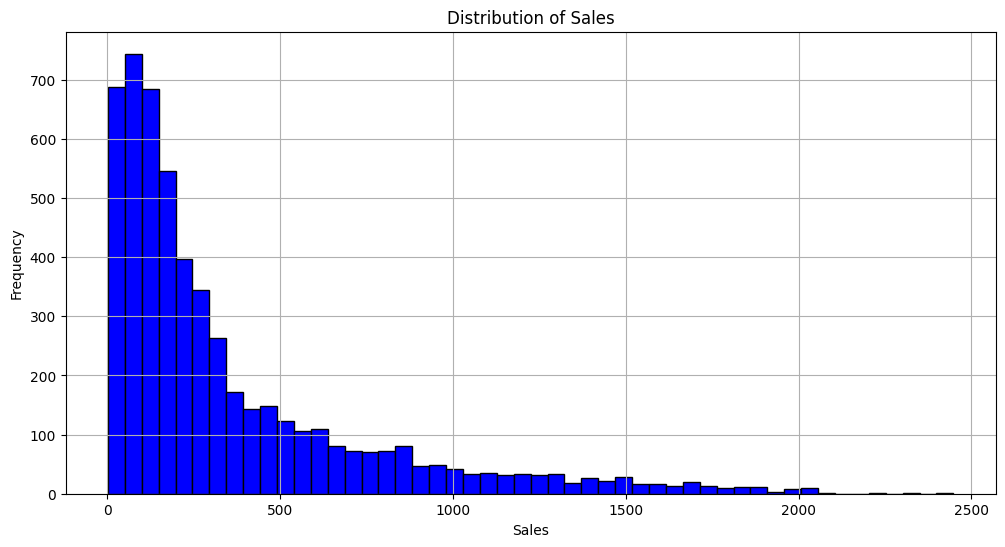

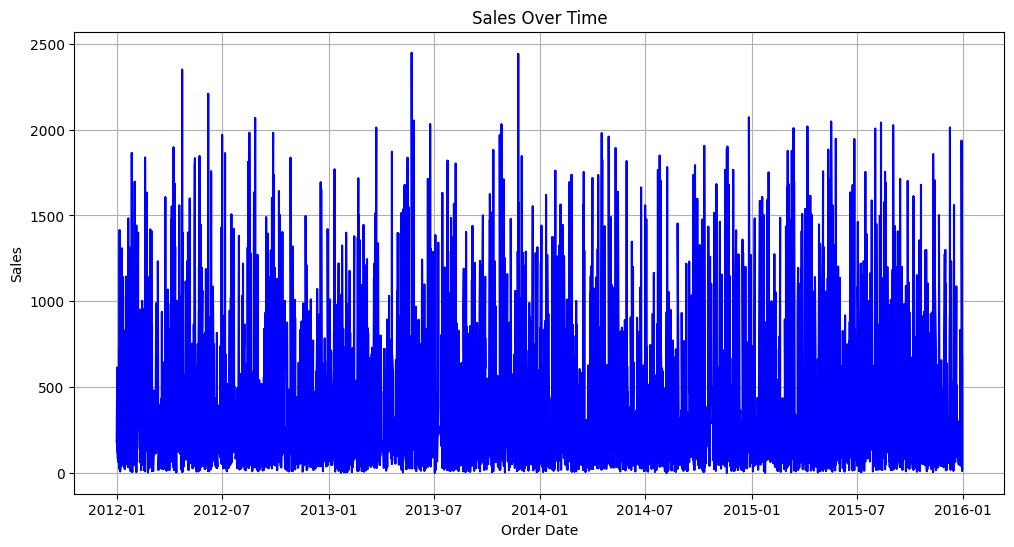

In [58]:
# Plot the distribution of sales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(data['Sales'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], color='blue')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [59]:
print(data.columns)


Index(['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order ID', 'Order Priority', 'Order Quantity',
       'Product Base Margin', 'Product Category', 'Product Container',
       'Product Name', 'Product Sub-Category', 'Profit', 'Region', 'Row ID',
       'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost', 'State',
       'Unit Price', 'Zip Code', 'Order Processing Time', 'Total Discount',
       'Profit Margin', 'Order Year', 'Order Month', 'Order Day of Week',
       'Order Week of Year'],
      dtype='object')


### *TIME SERIES ANALYSIS*

> ARIMA Model

In [60]:
sales = data['Sales']

In [61]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sales, order=(5, 1, 0))

results = model.fit()

print(results.summary())

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 5416
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -40479.170
Date:                Mon, 13 Jan 2025   AIC                          80970.340
Time:                        16:25:31   BIC                          81009.922
Sample:                             0   HQIC                         80984.157
                               - 5416                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8497      0.013    -64.697      0.000      -0.875      -0.824
ar.L2         -0.6860      0.016    -42.034      0.000      -0.718      -0.654
ar.L3         -0.5258      0.018    -29.928      0.0

In [62]:
forecast = results.forecast(steps=12)
print(forecast)


5416    654.308699
5417    433.566057
5418    402.671110
5419    406.473320
5420    435.722878
5421    502.948346
5422    471.538531
5423    440.643808
5424    442.476316
5425    450.763349
5426    458.083169
5427    461.052476
Name: predicted_mean, dtype: float64


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [63]:
increase_rate = 0.1
adjusted_forecast = forecast * (1 + increase_rate)
print(adjusted_forecast)


5416    719.739569
5417    476.922662
5418    442.938221
5419    447.120652
5420    479.295166
5421    553.243180
5422    518.692384
5423    484.708189
5424    486.723948
5425    495.839684
5426    503.891485
5427    507.157724
Name: predicted_mean, dtype: float64


In [64]:
# Define the start index
start = 0

# Generate prediction results with an integer index beginning at `start`
prediction_results = pd.Series(adjusted_forecast.values, index=range(start, start + len(adjusted_forecast)))

# Display the prediction results
print(prediction_results)

0     719.739569
1     476.922662
2     442.938221
3     447.120652
4     479.295166
5     553.243180
6     518.692384
7     484.708189
8     486.723948
9     495.839684
10    503.891485
11    507.157724
dtype: float64


In [65]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 5416
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -40479.170
Date:                Mon, 13 Jan 2025   AIC                          80970.340
Time:                        16:25:32   BIC                          81009.922
Sample:                             0   HQIC                         80984.157
                               - 5416                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8497      0.013    -64.697      0.000      -0.875      -0.824
ar.L2         -0.6860      0.016    -42.034      0.000      -0.718      -0.654
ar.L3         -0.5258      0.018    -29.928      0.0

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



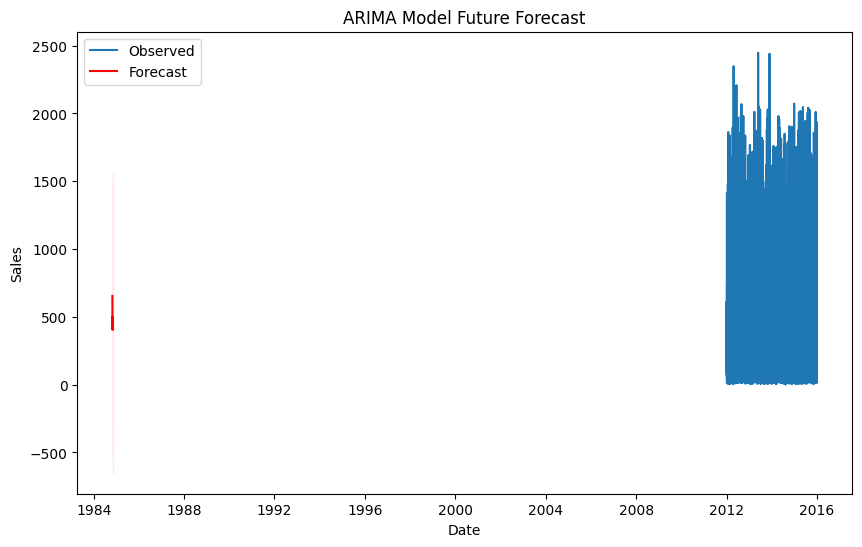

In [66]:
# Forecast future values
forecast_steps = 12  # Number of steps to forecast
future_forecast = model_fit.get_forecast(steps=forecast_steps)
future_forecast_df = future_forecast.summary_frame()

# Plot the forecasted values along with the confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], label='Observed')
plt.plot(future_forecast_df.index, future_forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(future_forecast_df.index, future_forecast_df['mean_ci_lower'], future_forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Model Future Forecast')
plt.legend()
plt.show()

> Linear Regression

In [67]:
import numpy as np

In [68]:
historical_trend = np.polyfit(range(len(sales)), sales, 1)
historical_trend_line = np.polyval(historical_trend, range(len(sales)))

In [69]:
def plot_forecast(increase_rate):
    adjusted_forecast = forecast * (1 + increase_rate)

In [70]:
def plot_forecast(increase_rate):
    """
    Adjusts the forecast based on the given increase rate and plots the result.

    Parameters:
    increase_rate (float): The rate at which the forecast should be increased. 
                           This should be a decimal representing the percentage increase 
                           (e.g., 0.1 for a 10% increase).

    Returns:
    None
    """

> PLOTLY -  creation of interactive and visually appealing plots, charts, and dashboards.

In [71]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [72]:
import plotly.graph_objects as go
import plotly.express as px

EXAMPLE to how to use plotly

In [73]:
import plotly.graph_objects as go


fig = go.Figure()


fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]))


fig.show()

PLOTLY used in walamart data analysis 

In [74]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

# Add historical sales data
fig.add_trace(go.Scatter(x=sales.index, y=sales, mode='lines', name='Historical Sales'))

# Add forecasted sales data
fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines', name='Forecast'))

# Add adjusted forecasted sales data
fig.add_trace(go.Scatter(x=forecast_index, y=adjusted_forecast, mode='lines', name='Adjusted Forecast'))

# Update layout
fig.update_layout(
    title="Walmart Sales Forecast",
    xaxis_title="Date",
    yaxis_title="Sales",
    legend_title="Legend",
    template='plotly_white'
)

# Show plot
fig.show()

> DETAILED ANALYSIS OF THE WALMART SALES FORECAST

In [75]:
fig.add_trace(go.Scatter(x=sales.index, y=sales, mode='lines', name='Historical Sales'))

In [76]:
fig.add_trace(go.Scatter(x=sales.index, y=historical_trend_line, mode='lines', name='Trend Line'))

In [77]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

# Add historical sales data
fig.add_trace(go.Scatter(x=sales.index, y=sales, mode='lines', name='Historical Sales'))

# Add forecasted sales data
fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines', name='Forecast'))

# Add adjusted forecasted sales data
fig.add_trace(go.Scatter(x=forecast_index, y=adjusted_forecast, mode='lines', name='Adjusted Forecast'))

# Update layout
fig.update_layout(
    title="Walmart Sales Forecast",
    xaxis_title="Date",
    yaxis_title="Sales",
    legend_title="Legend",
    template='plotly_white'
)

# Show plot
fig.show()

In [78]:
sales = data['Sales']

In [79]:
fig.add_trace(go.Scatter(x=forecast_index, y=adjusted_forecast, mode='lines', name='Adjusted Forecast'))

In [80]:
fig.update_layout(
        title="Sales Forecast with Parameter-Based Scenarios",
        xaxis_title="Date",
        yaxis_title="Sales",
        legend_title="Legend",
    )

    #show figure
fig.show()

> MAKING A WIDGET SLIDER 

In [81]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.FloatSlider(
    value=0.1,
    min=0,
    max=0.5,
    step=0.01,
    description="Increase Rate"
)

display(slider)

FloatSlider(value=0.1, description='Increase Rate', max=0.5, step=0.01)

In [82]:
print("Increase Rate:", slider.value)


Increase Rate: 0.1


> Checking the Stationarity of Time Series Using ANOVA Test

In [83]:
import numpy as np
from scipy import stats

def check_stationarity(series, n, alpha=0.05):
    partitions = np.array_split(series, n)
    for i, part in enumerate(partitions):
        print(f'Partition {i+1}: mean={part.mean()}, variance={part.var()}')

    f_val, p_val = stats.f_oneway(*partitions)
    print(f'F-value: {f_val}, p-value: {p_val}')

    if p_val <= alpha:
        print('Partitions are significantly different --> Non-Stationary')
    else:
        print('Partitions are not significantly different --> Stationary')


np.random.seed(0)
y_stationary = np.random.randn(100)
y_non_stationary = np.cumsum(np.random.randn(100))


print('Stationary data')
check_stationarity(y_stationary, n=5)

print('Non-stationary data')
check_stationarity(y_non_stationary, n=5)

Stationary data
Partition 1: mean=0.5693345929456347, variance=0.7228107940950779
Partition 2: mean=0.055750353486713256, variance=1.4109179363168722
Partition 3: mean=-0.39508305976855773, variance=0.7703520510999329
Partition 4: mean=-0.35217102320782995, variance=0.5414209132188481
Partition 5: mean=0.42120921421646457, variance=0.8667341584721395
F-value: 4.223750772972402, p-value: 0.0034331478724914143
Partitions are significantly different --> Non-Stationary
Non-stationary data
Partition 1: mean=4.054679168490303, variance=12.905639595449898
Partition 2: mean=11.16394691353869, variance=1.032040461360873
Partition 3: mean=12.478090800258052, variance=2.065156370981873
Partition 4: mean=11.969925351790375, variance=0.9826169400757216
Partition 5: mean=5.368633080053631, variance=4.742892895090007
F-value: 69.1272842637174, p-value: 2.68452471098721e-27
Partitions are significantly different --> Non-Stationary


> Performing Augmented Dickey-Fuller Test for Stationarity on Sales Data

In [84]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('lets_walmart_retail_data.csv')

time_series = data['Sales']

adf_result = adfuller(time_series)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -74.39346355022997
p-value: 0.0


In [85]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [87]:
from xgboost import XGBRegressor

In [90]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [97]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)                       # Calculate RMSE manually

print(f"RMSE: {rmse}")


RMSE: 395.4229230022667


> SALES FORECAST BY PRODUCT CATEGORY

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\4159994085.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\4159994085.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\4159994085.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

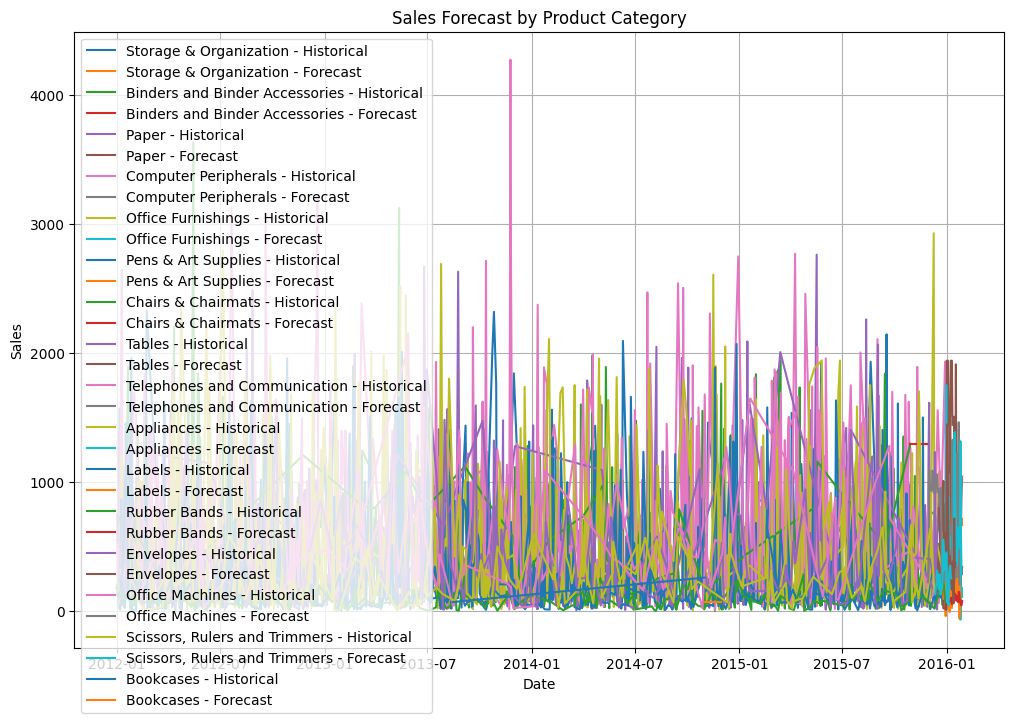

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'data' is already loaded and contains the necessary columns
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Check if 'Product Category' column exists, if not, use the correct column name
if 'Product Category' not in data.columns:
    data['Product Category'] = data['Product Sub-Category']  # Assuming 'Product Sub-Category' is the correct column

# Group by 'Order Date' and 'Product Category' and aggregate sales
category_sales = data.groupby(['Order Date', 'Product Category']).agg({'Sales': 'sum'}).reset_index()

categories = category_sales['Product Category'].unique()
forecast_results = {}

for category in categories:
    category_data = category_sales[category_sales['Product Category'] == category]

    category_data['Year'] = category_data['Order Date'].dt.year
    category_data['Month'] = category_data['Order Date'].dt.month
    category_data['Day'] = category_data['Order Date'].dt.day
    category_data['Weekday'] = category_data['Order Date'].dt.weekday

    X = category_data[['Year', 'Month', 'Day', 'Weekday']]
    y = category_data['Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    future_dates = pd.date_range(category_data['Order Date'].max(), periods=30)
    future_features = pd.DataFrame({
        'Year': future_dates.year,
        'Month': future_dates.month,
        'Day': future_dates.day,
        'Weekday': future_dates.weekday
    })
    future_forecast = model.predict(future_features)

    forecast_results[category] = {
        'historical': category_data,
        'forecast': pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})
    }

plt.figure(figsize=(12, 8))
for category, results in forecast_results.items():
    plt.plot(results['historical']['Order Date'], results['historical']['Sales'], label=f"{category} - Historical")
    plt.plot(results['forecast']['Date'], results['forecast']['Forecast'], label=f"{category} - Forecast")

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast by Product Category")
plt.legend()
plt.grid()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\2779980407.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\2779980407.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\2779980407.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

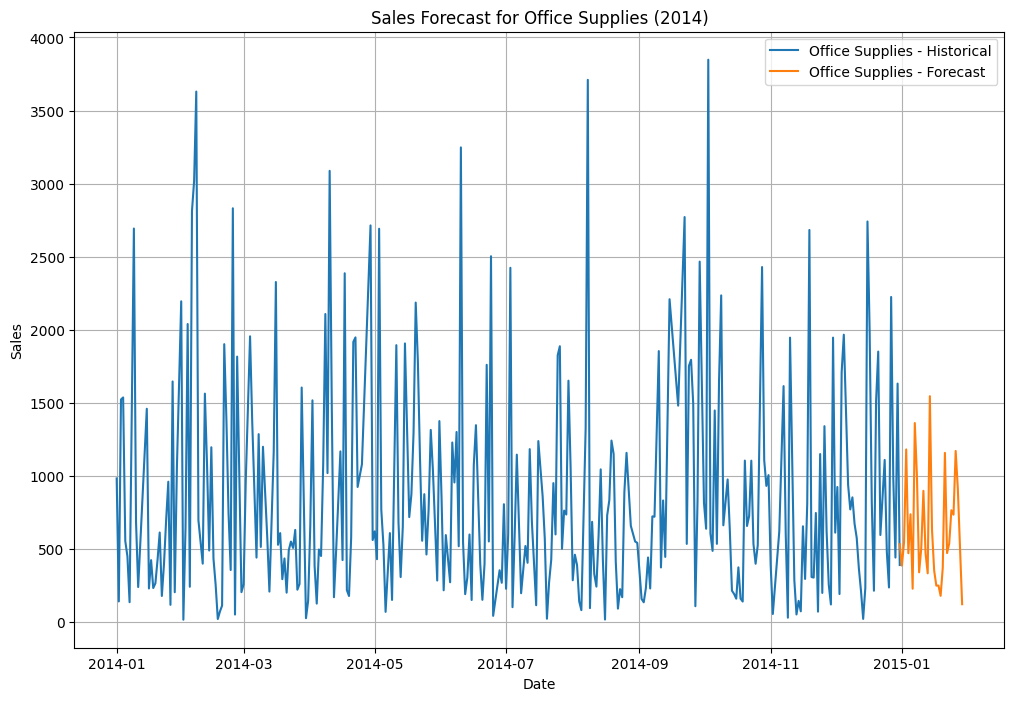

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("lets_walmart_retail_data.csv")
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Filter data for a specific year (e.g., 2014)
data = data[data['Order Date'].dt.year == 2014]

# Aggregate data by Product Category and Order Date
category_sales = data.groupby(['Order Date', 'Product Category']).agg({'Sales': 'sum'}).reset_index()

# Filter for a specific category
category = 'Office Supplies'
category_data = category_sales[category_sales['Product Category'] == category]

# Check if category_data is not empty
if not category_data.empty:
    # Feature Engineering
    category_data['Year'] = category_data['Order Date'].dt.year
    category_data['Month'] = category_data['Order Date'].dt.month
    category_data['Day'] = category_data['Order Date'].dt.day
    category_data['Weekday'] = category_data['Order Date'].dt.weekday

    # Define features and target
    X = category_data[['Year', 'Month', 'Day', 'Weekday']]
    y = category_data['Sales']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train XGBoost model
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Forecast for future dates (example: next 30 days)
    future_dates = pd.date_range(category_data['Order Date'].max(), periods=30)
    future_features = pd.DataFrame({
        'Year': future_dates.year,
        'Month': future_dates.month,
        'Day': future_dates.day,
        'Weekday': future_dates.weekday
    })
    future_forecast = model.predict(future_features)

    # Store results
    forecast_results = {
        'historical': category_data,
        'forecast': pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})
    }

# Plot historical and forecast sales for the category
plt.figure(figsize=(12, 8))
plt.plot(category_data['Order Date'], category_data['Sales'], label=f"{category} - Historical")
plt.plot(future_dates, future_forecast, label=f"{category} - Forecast")

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title(f"Sales Forecast for {category} (2014)")
plt.legend()
plt.grid()
plt.show()


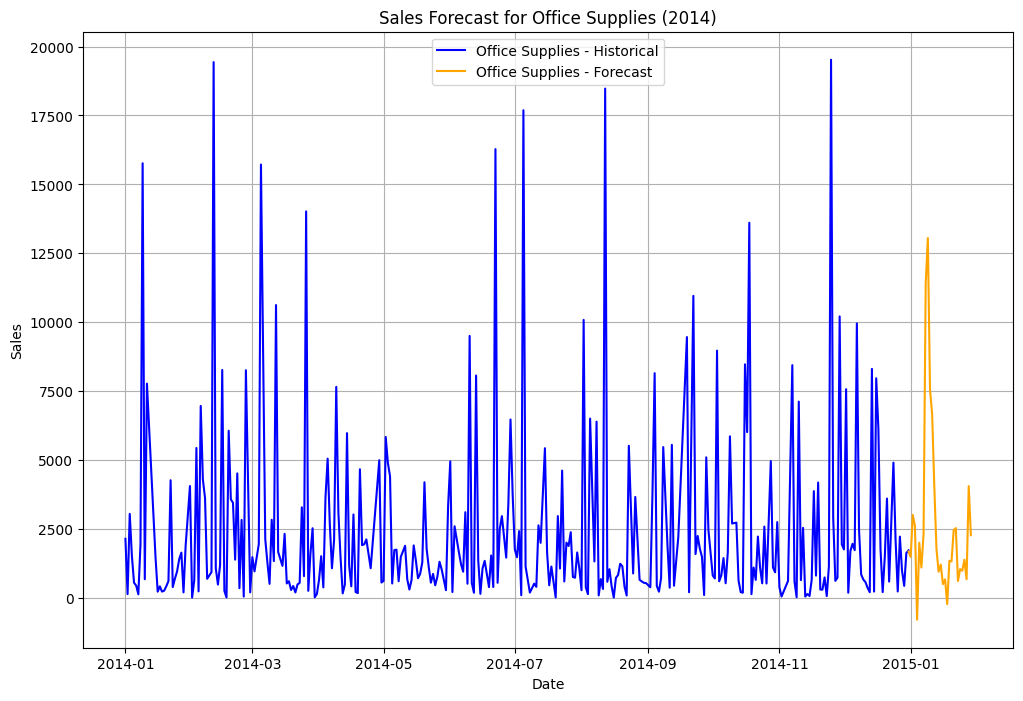

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_excel("walmart Retail Data.xlsx", engine="openpyxl")
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data for 2014 and "Office Supplies" category
df = df[(df['Order Date'].dt.year == 2014) & (df['Product Category'] == 'Office Supplies')]

# Aggregate data by Order Date
category_sales = df.groupby(['Order Date']).agg({'Sales': 'sum'}).reset_index()

# Feature Engineering
category_sales['Year'] = category_sales['Order Date'].dt.year
category_sales['Month'] = category_sales['Order Date'].dt.month
category_sales['Day'] = category_sales['Order Date'].dt.day
category_sales['Weekday'] = category_sales['Order Date'].dt.weekday

# Define features and target
X = category_sales[['Year', 'Month', 'Day', 'Weekday']]
y = category_sales['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Forecast for future dates (example: next 30 days)
future_dates = pd.date_range(category_sales['Order Date'].max(), periods=30)
future_features = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'Weekday': future_dates.weekday
})
future_forecast = model.predict(future_features)



# Plot historical and forecast sales
plt.figure(figsize=(12, 8))

# Plot historical sales
plt.plot(category_sales['Order Date'], category_sales['Sales'], label="Office Supplies - Historical", color='blue')

# Plot forecast sales
plt.plot(future_dates, future_forecast, label="Office Supplies - Forecast", color='orange')

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast for Office Supplies (2014)")
plt.legend()
plt.grid()
plt.show()


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [118]:

data = pd.read_csv("lets_walmart_retail_data.csv")


print("Initial Dataset:")
print(data.head())


Initial Dataset:
         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport            54     Jessica Myrick   Small Business      0.10   
1  Montebello            54  Elizabeth Moffitt         Consumer      0.08   
2  Montebello            54  Elizabeth Moffitt         Consumer      0.09   
3  Prior Lake            54     David Philippe         Consumer      0.06   
4      Draper            54         Larry Tron      Home Office      0.05   

   Number of Records  Order Date  Order ID Order Priority  Order Quantity  \
0                  1  2012-01-01     28774           High              32   
1                  1  2012-01-02     44069       Critical              43   
2                  1  2012-01-02     44069       Critical              16   
3                  1  2012-01-02      9285       Critical               3   
4                  1  2012-01-03      9762           High              12   

   ...         State Unit Price Zip Code Order Processing

In [121]:
# Extract 'Sales' column
data = data[['Sales']]

print("\nProcessed Data:")
print(data.head())
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill or drop missing values if any
data['Sales'].fillna(data['Sales'].mean(), inplace=True)


Processed Data:
             Sales
Order Date        
2012-01-01  180.36
2012-01-02  614.80
2012-01-02  137.63
2012-01-02  124.81
2012-01-03  262.76

Missing Values:
Sales    0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\1866357131.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





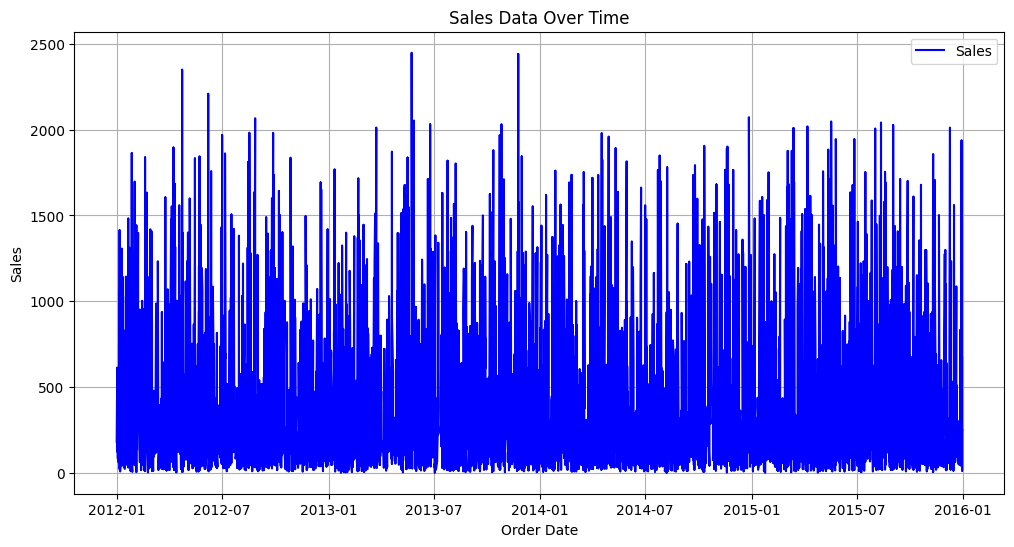

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Sales', color='blue')
plt.title('Sales Data Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data:")
print(X_train.head())
print(y_train.head())

print("\nTesting Data:")
print(X_test.head())
print(y_test.head())

Training Data:
     Year  Month  Day  Weekday
381  2014      8   26        1
145  2014      3   30        6
176  2014      4   18        4
405  2014      9   11        3
584  2014     12   24        2
381    1156.06
145      23.84
176     215.88
405     371.31
584    1107.46
Name: Sales, dtype: float64

Testing Data:
     Year  Month  Day  Weekday
140  2014      3   26        2
518  2014     11   19        2
51   2014      1   31        4
471  2014     10   24        4
21   2014      1   11        5
140     218.82
518    2682.06
51     2193.59
471     532.11
21      237.16
Name: Sales, dtype: float64


> SARIMAX MODEL

In [127]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split the data into training and testing sets
train = data[:int(0.8*(len(data)))]
test = data[int(0.8*(len(data))):]

# Define the SARIMA model
model = SARIMAX(train['Sales'],
                order=(1, 1, 1), # (p, d, q) - Adjust these parameters based on data
                seasonal_order=(1, 1, 1, 12)) # (P, D, Q, S) for seasonality

results = model.fit()

# Print summary of the model
print("\nSARIMA Model Summary:")
print(results.summary())

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.




SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 4332
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -31959.381
Date:                            Mon, 13 Jan 2025   AIC                          63928.762
Time:                                    17:02:38   BIC                          63960.616
Sample:                                         0   HQIC                         63940.009
                                           - 4332                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0074      0.015      0.481      0.630      -0.023       0.037
ma.L1       

In [129]:
# Forecast for the test period
forecast = results.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Evaluate forecast accuracy
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast_values))
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 414.80833825025934


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



ACTUAL V/S FORECAST SALES GRAPH 

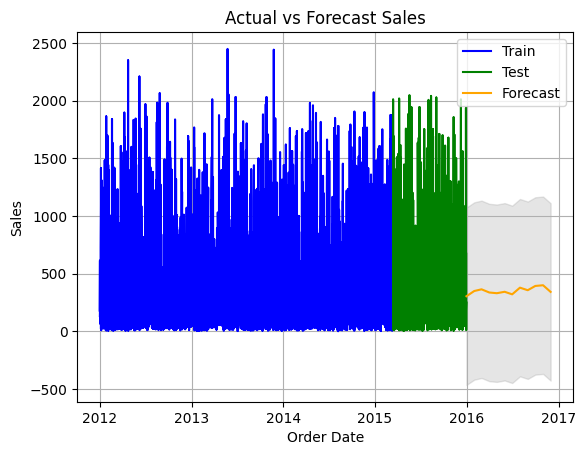

In [153]:
# Plot actual vs forecast

plt.plot(train.index, train['Sales'], label='Train', color='blue')
plt.plot(test.index, test['Sales'], label='Test', color='green')
plt.plot(future_dates, future_forecast_values, label='Forecast', color='orange')
plt.fill_between(future_dates, future_forecast_ci['lower Sales'], future_forecast_ci['upper Sales'], color='gray', alpha=0.2)
plt.title('Actual vs Forecast Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

FUTURE FORECAST GRAPH

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\469198630.py:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



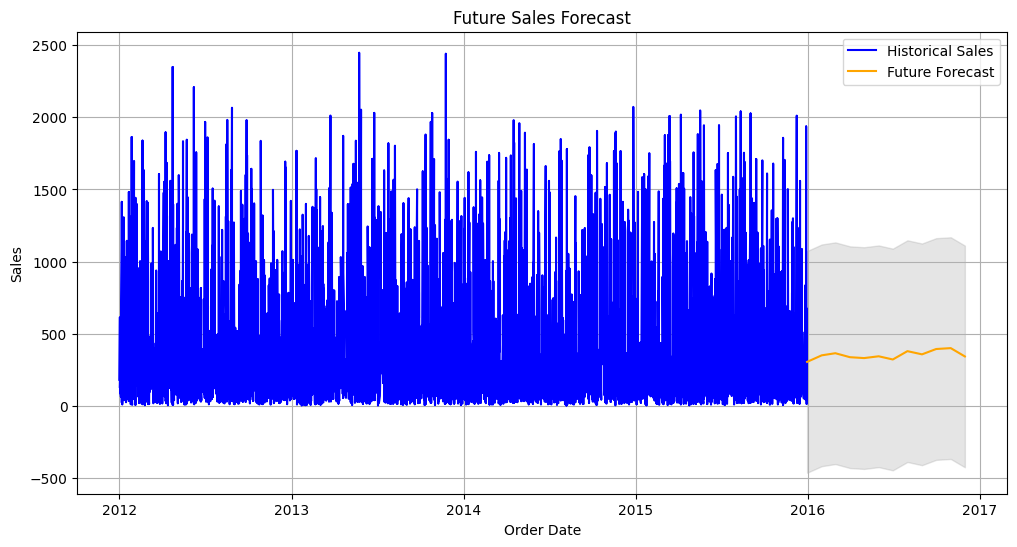

In [131]:
# Future forecast beyond the test period
future_forecast = results.get_forecast(steps=12)  # Forecast for the next 12 periods (e.g., months)
future_forecast_values = future_forecast.predicted_mean
future_forecast_ci = future_forecast.conf_int()

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Historical Sales', color='blue')
future_dates = pd.date_range(start=data.index[-1], periods=12, freq='M')
plt.plot(future_dates, future_forecast_values, label='Future Forecast', color='orange')
plt.fill_between(future_dates, future_forecast_ci.iloc[:, 0], future_forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title('Future Sales Forecast')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

> Historical Sales Data Graph 

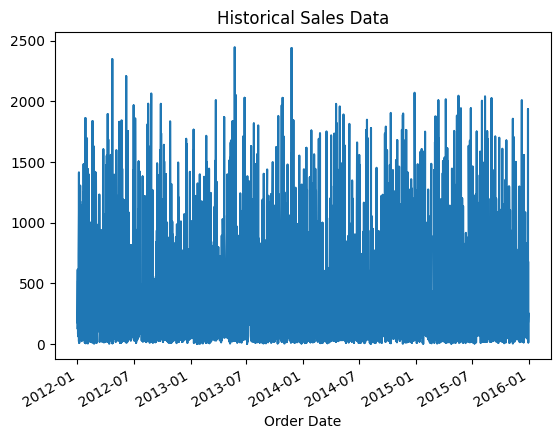

In [133]:
import matplotlib.pyplot as plt
data['Sales'].plot(title='Historical Sales Data')
plt.show()


In [135]:
import pandas as pd
data = pd.read_csv('lets_walmart_retail_data.csv')
print(data.head())

         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport            54     Jessica Myrick   Small Business      0.10   
1  Montebello            54  Elizabeth Moffitt         Consumer      0.08   
2  Montebello            54  Elizabeth Moffitt         Consumer      0.09   
3  Prior Lake            54     David Philippe         Consumer      0.06   
4      Draper            54         Larry Tron      Home Office      0.05   

   Number of Records  Order Date  Order ID Order Priority  Order Quantity  \
0                  1  2012-01-01     28774           High              32   
1                  1  2012-01-02     44069       Critical              43   
2                  1  2012-01-02     44069       Critical              16   
3                  1  2012-01-02      9285       Critical               3   
4                  1  2012-01-03      9762           High              12   

   ...         State Unit Price Zip Code Order Processing Time Total Disco

SALES DATA WITH OUTLIERS HIGHLIGHTED

In [136]:
import pandas as pd
import numpy as np

sales_data = data['Sales']

def calculate_z_scores(data):
    mean = data.mean()
    std_dev = data.std()
    return (data - mean) / std_dev

z_scores = calculate_z_scores(sales_data)

def detect_outliers(z_scores, threshold=1):
    return data[np.abs(z_scores) > threshold]

outliers = detect_outliers(z_scores)

print("Outliers detected:")
print(outliers)


Outliers detected:
                     City  Customer Age     Customer Name Customer Segment  \
24     Hilton Head Island            54      Craig Leslie         Consumer   
25                Herndon            54     Tracy Collins         Consumer   
46         Essex Junction            54  Giulietta Dortch        Corporate   
49              Hazelwood            54   Maria Bertelson      Home Office   
50    Pleasure Ridge Park            54    Michelle Moray        Corporate   
...                   ...           ...               ...              ...   
5382        American Fork            80     Harold Pawlan   Small Business   
5383            Bountiful            81     Harold Pawlan   Small Business   
5387            Lynchburg            81    Lisa DeCherney        Corporate   
5403            Lakeville            86      Roland Black   Small Business   
5410            Horn Lake            88  Jennifer Jackson      Home Office   

      Discount  Number of Records  Order Dat

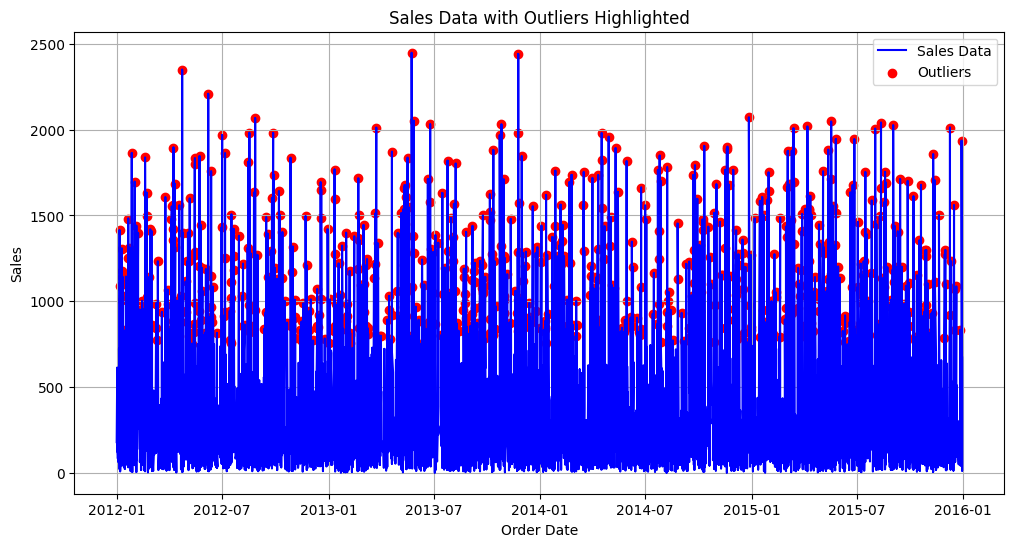

In [142]:
import matplotlib.pyplot as plt

# Ensure 'Order Date' is in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Plot sales data with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(data['Order Date'], data['Sales'], label='Sales Data', color='blue')
plt.scatter(outliers['Order Date'], outliers['Sales'], color='red', label='Outliers')
plt.title('Sales Data with Outliers Highlighted')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [143]:
import pandas as pd
import numpy as np

sales_data = data['Sales']

def calculate_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

def remove_outliers(data, threshold=1.5):
    Q1, Q3, IQR = calculate_iqr(data)
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

filtered_data = remove_outliers(sales_data)

print("Data after removing outliers:")
print(filtered_data)


Data after removing outliers:
0       180.36
1       614.80
2       137.63
3       124.81
4       262.76
         ...  
5411    580.96
5412    448.10
5413    257.46
5414     14.15
5415    672.93
Name: Sales, Length: 4981, dtype: float64


SALES DATA WITHOUT OUTLIERS

Outliers detected:
    Order Date Product Category    Sales  Year  Month  Day  Weekday  \
32  2014-01-20  Office Supplies   424.00  2014      1   20        0   
48  2014-01-29  Office Supplies  1058.61  2014      1   29        2   
63  2014-02-06  Office Supplies  3018.27  2014      2    6        3   
152 2014-04-02  Office Supplies  1515.56  2014      4    2        2   
191 2014-04-30  Office Supplies   559.27  2014      4   30        2   
199 2014-05-04  Office Supplies   767.60  2014      5    4        6   
233 2014-05-25  Office Supplies   460.12  2014      5   25        6   
268 2014-06-15  Office Supplies   148.36  2014      6   15        6   

    Outlier_Label  
32        Outlier  
48        Outlier  
63        Outlier  
152       Outlier  
191       Outlier  
199       Outlier  
233       Outlier  
268       Outlier  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\3129019452.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



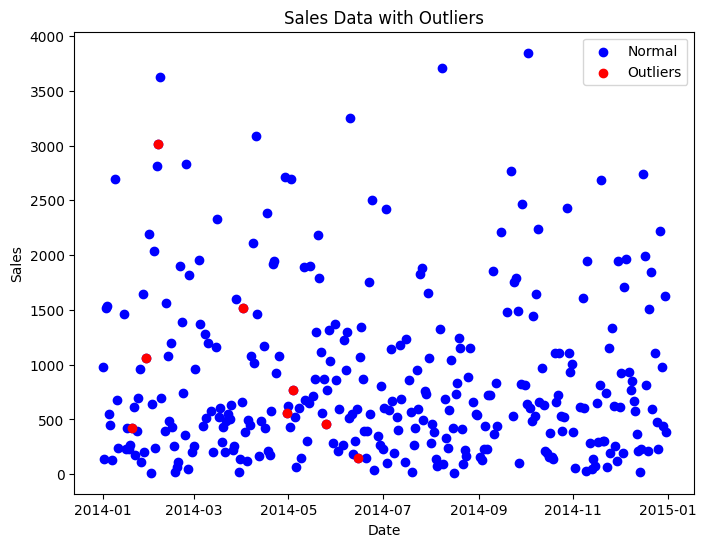

In [144]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

# Use the 'category_data' DataFrame
sales_data = category_data['Sales']

# Initialize the IsolationForest model
model = IsolationForest(contamination=0.05)
outliers = model.fit_predict(category_data[['Sales']])

# Create a new column for outlier labels
outliers_labels = pd.Series(outliers).replace({1: 'Normal', -1: 'Outlier'})
category_data['Outlier_Label'] = outliers_labels

# Extract the outliers
outliers_data = category_data[category_data['Outlier_Label'] == 'Outlier']

print("Outliers detected:")
print(outliers_data)

# Plot the sales data with outliers highlighted
plt.figure(figsize=(8, 6))
plt.scatter(category_data['Order Date'], category_data['Sales'], label='Normal', color='blue')
plt.scatter(outliers_data['Order Date'], outliers_data['Sales'], label='Outliers', color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Data with Outliers")
plt.legend()
plt.show()


In [145]:
from statsmodels.tsa.arima.model import ARIMA

# Experiment with different order values
for p in range(1, 4):
    for d in range(0, 2):
        for q in range(1, 4):
            model = ARIMA(data['Sales'], order=(p, d, q))
            results = model.fit()
            print(f'ARIMA({p},{d},{q}) - AIC:{results.aic}')


ARIMA(1,0,1) - AIC:80178.12233487635
ARIMA(1,0,2) - AIC:80180.12493045194
ARIMA(1,0,3) - AIC:80181.9651061373
ARIMA(1,1,1) - AIC:80170.90010902526
ARIMA(1,1,2) - AIC:80173.15352660081
ARIMA(1,1,3) - AIC:80174.80802644786


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2,0,1) - AIC:80180.12415076149
ARIMA(2,0,2) - AIC:80181.66199393346


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2,0,3) - AIC:80183.3969765734
ARIMA(2,1,1) - AIC:80172.89744079637
ARIMA(2,1,2) - AIC:80174.80337245927


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2,1,3) - AIC:80169.94199758617
ARIMA(3,0,1) - AIC:80181.85772212039
ARIMA(3,0,2) - AIC:80184.02596478566


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(3,0,3) - AIC:80185.34432222847
ARIMA(3,1,1) - AIC:80174.6382688529
ARIMA(3,1,2) - AIC:80176.86990845273
ARIMA(3,1,3) - AIC:80176.13767627225


> SIMPLIFIED SALES FORECAST

In [147]:
import pandas as pd
import plotly.graph_objects as go

# Load the data
data = pd.read_csv("lets_walmart_retail_data.csv")
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Filter data for the year 2014
start_date = '2014-01-01'
end_date = '2014-12-31'
filtered_df = data[(data['Order Date'] >= start_date) & (data['Order Date'] <= end_date)]

# Create a 'Month' column
filtered_df['Month'] = filtered_df['Order Date'].dt.to_period('M')

# Create forecast index for the next 12 months
forecast_index = pd.date_range(start=filtered_df['Order Date'].max(), periods=12, freq='M')

# Extract the correct number of forecast values
forecast_values = forecast_values[-12:]  # Get the last 12 forecast values
adjusted_forecast_values = adjusted_forecast.values  # Assuming 'adjusted_forecast' is your Series

# Create a DataFrame for forecast values
forecast_df = pd.DataFrame({'Month': forecast_index.to_period('M'),
                            'Forecast': forecast_values,
                            'Adjusted_Forecast': adjusted_forecast_values})

# Merge the historical and forecast data
monthly_data = pd.merge(filtered_df, forecast_df, on='Month', how='left')

# Group by 'Month' and aggregate sales and forecast values
monthly_data = monthly_data.groupby('Month').agg({
    'Sales': 'sum',
    'Forecast': 'sum',
    'Adjusted_Forecast': 'sum'
}).reset_index()

# Plotting the data
fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_data['Month'].astype(str),
                         y=monthly_data['Sales'],
                         mode='lines+markers',
                         name='Historical Sales'))

fig.add_trace(go.Scatter(x=monthly_data['Month'].astype(str),
                         y=monthly_data['Forecast'],
                         mode='lines',
                         name='Forecast'))

fig.add_trace(go.Scatter(x=monthly_data['Month'].astype(str),
                         y=monthly_data['Adjusted_Forecast'],
                         mode='lines',
                         name='Adjusted Forecast'))

fig.update_layout(
    title='Simplified Sales Forecast (2014)',
    xaxis_title='Date (Month)',
    yaxis_title='Sales',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\971787573.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24564\971787573.py:17: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

